In [1]:
import json
from App.classes.LineBuilder import create_ordered_line

data = json.load(open('shapefiles/gold_northbound/goldJSON.json'))

gold_line = create_ordered_line(data)

In [2]:
import pandas as pd

stop_times = pd.read_csv('GTFS/stop_times.csv')
stop_ids = stop_times.stop_id.tolist()

line_ids = list(map(lambda x: str(x)[0:3], stop_ids))
station_ids = list(map(lambda x: str(int(str(x)[3:5])), stop_ids))

line_id = pd.DataFrame({"line_id": line_ids})
stop_ids = pd.DataFrame({"station_id": station_ids})

In [3]:
stop_times = pd.concat([stop_times, line_id, stop_ids], axis=1)

In [4]:
from App.classes.Line import loadStations
import json
stations = json.load(open('misc/GoldLineStationIds.json'))['items']
gold_line_stations = loadStations(stations, gold_line)
gold_line_stations = gold_line_stations.rename(columns={'station_id': 'stop_id'})
gold_line_stations = gold_line_stations.drop(['line_id'], axis=1)

In [5]:
stop_times = stop_times.groupby('line_id').get_group('804')
stop_times = stop_times.rename(columns={'stop_id': 'full_id', 'station_id': 'stop_id'})

In [6]:
stop_times.

trip_id arrival_time departure_time  full_id  stop_sequence  \
117860  46474735     09:42:00       09:42:00    80401              1   
117861  46474735     09:44:00       09:44:00    80402              2   
117862  46474735     09:47:00       09:47:00    80403              3   
117863  46474735     09:52:00       09:52:00    80404              4   
117864  46474735     09:55:00       09:55:00    80405              5   

               stop_headsign  pickup_type  drop_off_type line_id stop_id  
117860  804 - Azusa / Citrus            0              0     804       1  
117861  804 - Azusa / Citrus            0              0     804       2  
117862  804 - Azusa / Citrus            0              0     804       3  
117863  804 - Azusa / Citrus            0              0     804       4  
117864  804 - Azusa / Citrus            0              0     804       5

In [48]:
gold_line_stations['stop_id'] = pd.Series(gold_line_stations.stop_id.apply(int), index=gold_line_stations.index)
gold_line_stations['stop_id'] = pd.Series(gold_line_stations.stop_id.apply(str), index=gold_line_stations.index)

In [49]:
merged = stop_times.merge(gold_line_stations, how = 'inner', on = 'stop_id')

In [50]:
merged.head()
merged.stop_id.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27'], dtype=object)

In [51]:
#stops = pd.read_csv('GTFS/stops.txt')

arrival_times = merged.arrival_time.tolist()

hrs = list(map(lambda x: int(str(x)[0:2]), arrival_times))
hrs = pd.DataFrame({"hrs": hrs})
merged = pd.concat([merged, hrs], axis=1)
truncated_schedule = merged[merged['hrs'] < 24]

truncated_schedule['datetime'] = pd.to_datetime('08/29/18' + ' ' + truncated_schedule['arrival_time'])
truncated_schedule = truncated_schedule.set_index(pd.DatetimeIndex(truncated_schedule['datetime']))
truncated_schedule = truncated_schedule.sort_index()

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [52]:
gold_line_scheduled = truncated_schedule

from App.classes.Tracker import selectAnalysisWindow, findRelativePositions
start_date = '08/29/18 11:02:00'
end_date = '08/29/18 19:00:00'

analysis_window = selectAnalysisWindow(gold_line_scheduled, start_date, end_date)
analysis_window.head()

trip_id arrival_time departure_time  full_id  \
datetime                                                             
2018-08-29 11:02:00  46318915     11:02:00       11:02:00    80426   
2018-08-29 11:02:00  46497289     11:02:00       11:02:00    80409   
2018-08-29 11:02:00  46318973     11:02:00       11:02:00    80422   
2018-08-29 11:02:00  46310941     11:02:00       11:02:00    80408   
2018-08-29 11:02:00  46318946     11:02:00       11:02:00    80408   

                     stop_sequence           stop_headsign  pickup_type  \
datetime                                                                  
2018-08-29 11:02:00              2  804 - Atlantic Station            0   
2018-08-29 11:02:00             19  804 - Atlantic Station            0   
2018-08-29 11:02:00              6  804 - Atlantic Station            0   
2018-08-29 11:02:00              8    804 - Azusa / Citrus            0   
2018-08-29 11:02:00              8    804 - Azusa / Citrus            0   

                     drop_off_type line_id stop_id  \
datetime                                             
2018-08-29 11:02:00              0     804      26   
2018-08-29 11:02:00              0     804       9   
2018-08-29 11:02:00              0     804      22   
2018-08-29 11:02:00              0     804       8   
2018-08-29 11:02:00              0     804       8   

                                             display_name     id  \
datetime                                                           
2018-08-29 11:02:00                Azusa Downtown Station  80426   
2018-08-29 11:02:00       Union Station - Metro Gold Line  80409   
2018-08-29 11:02:00                       Arcadia Station  80422   
2018-08-29 11:02:00  Little Tokyo / Arts District Station  80408   
2018-08-29 11:02:00  Little Tokyo / Arts District Station  80408   

                                          geometry  relative_position  hrs  \
datetime                                                                     
2018-08-29 11:02:00  POINT (-117.90663 34.1358599)           0.967392   11   
2018-08-29 11:02:00  POINT (-118.23476 34.0560599)           0.191207   11   
2018-08-29 11:02:00   POINT (-118.0292 34.1428599)           0.722853   11   
2018-08-29 11:02:00   POINT (-118.2379 34.0500999)           0.175213   11   
2018-08-29 11:02:00   POINT (-118.2379 34.0500999)           0.175213   11   

                               datetime  
datetime                                 
2018-08-29 11:02:00 2018-08-29 11:02:00  
2018-08-29 11:02:00 2018-08-29 11:02:00  
2018-08-29 11:02:00 2018-08-29 11:02:00  
2018-08-29 11:02:00 2018-08-29 11:02:00  
2018-08-29 11:02:00 2018-08-29 11:02:00

In [53]:
from App.classes.Visualizer import assignColorsToTrains

train_ids = list(analysis_window['trip_id'].unique())
#len(analysis_window)
colors = assignColorsToTrains(train_ids)

In [54]:
import geopandas as gpd
from shapely.geometry import Point

def scheduleToGDF(log):
  #geometry = [Point(xy) for xy in zip(log.lon, log.lat)]
  return gpd.GeoDataFrame(log[['vehicle_id', 'datetime']], crs = {'init': 'epsg:4326'}, geometry = log.geometry)

analysis_window = analysis_window.rename(columns={'stop_lat': 'lat', 'stop_lon': 'lon', 'trip_id': 'vehicle_id', 'stop_name': 'display_name'})
gdf = scheduleToGDF(analysis_window)

In [55]:
gdf.head()

vehicle_id            datetime  \
datetime                                              
2018-08-29 11:02:00    46318915 2018-08-29 11:02:00   
2018-08-29 11:02:00    46497289 2018-08-29 11:02:00   
2018-08-29 11:02:00    46318973 2018-08-29 11:02:00   
2018-08-29 11:02:00    46310941 2018-08-29 11:02:00   
2018-08-29 11:02:00    46318946 2018-08-29 11:02:00   

                                          geometry  
datetime                                            
2018-08-29 11:02:00  POINT (-117.90663 34.1358599)  
2018-08-29 11:02:00  POINT (-118.23476 34.0560599)  
2018-08-29 11:02:00   POINT (-118.0292 34.1428599)  
2018-08-29 11:02:00   POINT (-118.2379 34.0500999)  
2018-08-29 11:02:00   POINT (-118.2379 34.0500999)

In [56]:
from App.classes.Tracker import findRelativePositions
toVis = findRelativePositions(gdf, gold_line)

In [57]:
toVis = toVis.groupby('vehicle_id')

In [58]:
analysis_window.stop_id.unique()

array(['26', '9', '22', '8', '18', '13', '6', '4', '25', '17', '23', '14',
       '7', '19', '20', '27', '1', '12', '16', '5', '21', '11', '10',
       '24', '3', '2', '15'], dtype=object)

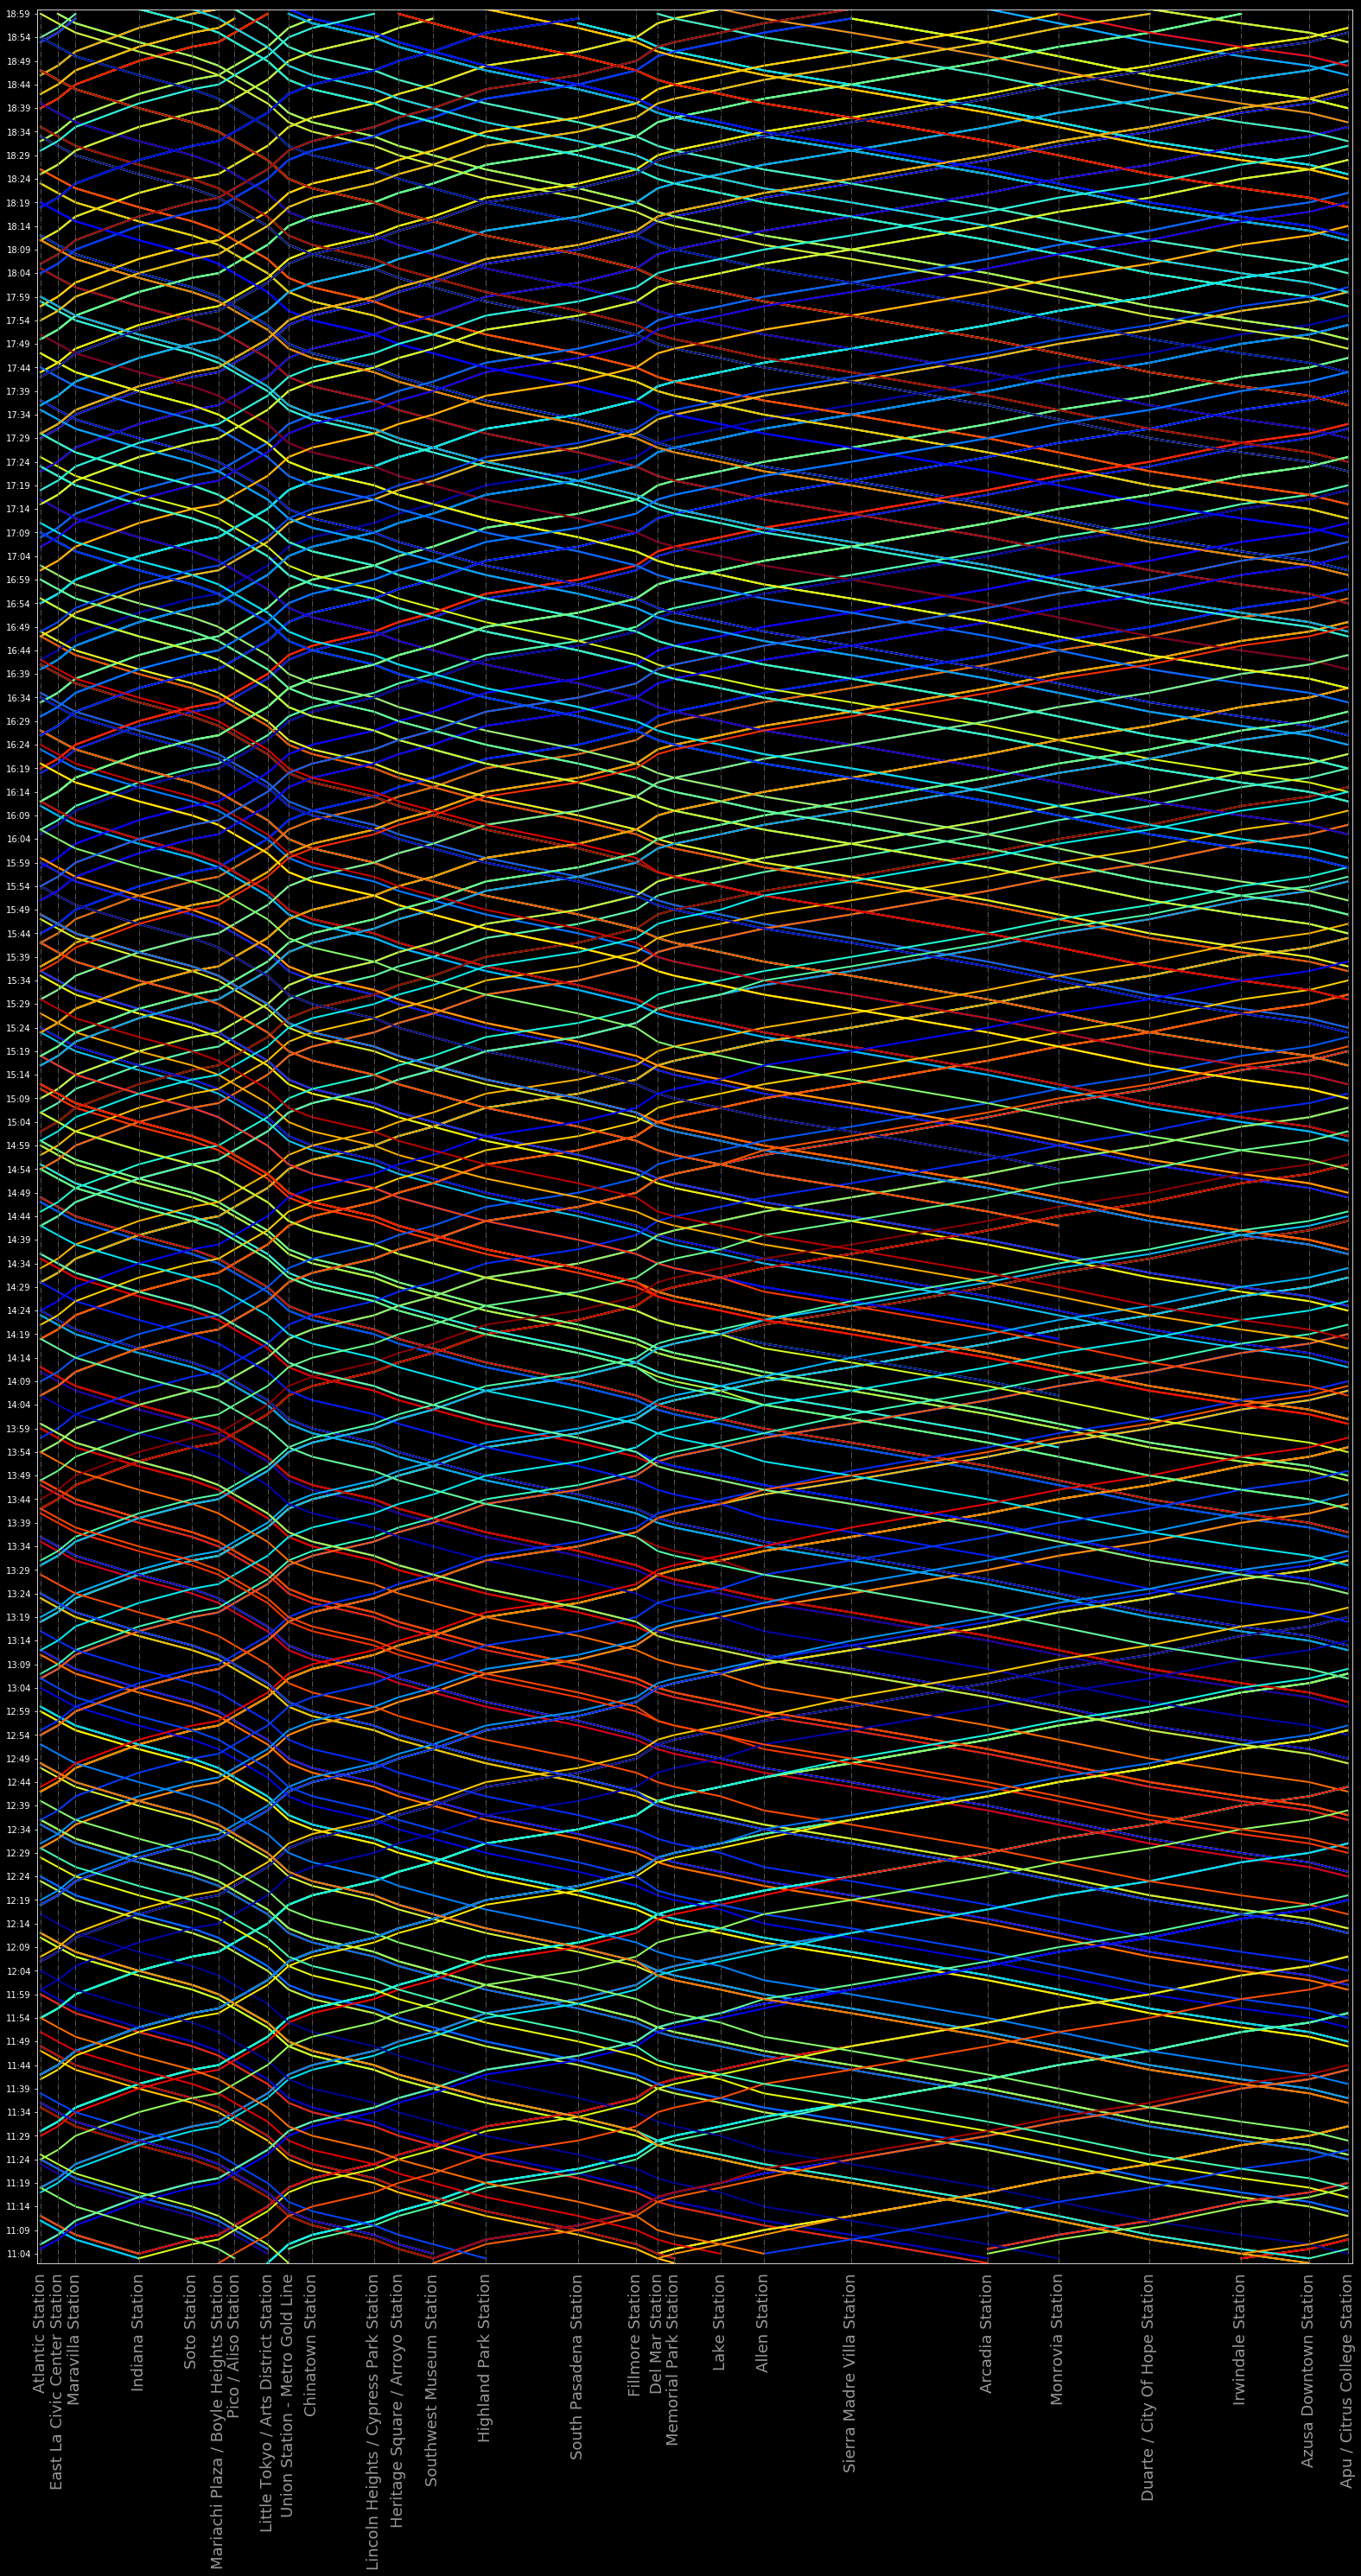

In [59]:
from App.classes.Visualizer import makeMarey

makeMarey(gold_line_stations, toVis, colors, pd.to_datetime(start_date), pd.to_datetime(end_date))